# Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:

!pip3 install fancyimpute category_encoders -q

  Using cached fancyimpute-0.7.0.tar.gz (25 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached knnimpute-0.1.0.tar.gz (8.3 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached scikit_learn-1.5.2-cp312-cp312-macosx_12_0_arm64.whl.metadata (13 kB)
  Using cached scipy-1.14.1-cp312-cp312-macosx_14_0_arm64.whl.metadata (60 kB)
  Using cached pandas-2.2.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
  Using cached pluggy-1.5.0-py3-none-any.whl.metadata (4.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 26.7 MB/s eta 0:00:00
Using cached pandas-2.2.3-cp312-cp312-macosx_11_0_arm64

In [2]:
!ls

Data                          LICENSE
Heart Disease Indicator.ipynb README.md


# Import Libraries

In [4]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from fancyimpute import IterativeImputer
from sklearn import preprocessing
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from category_encoders.binary import BinaryEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
import math
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV

# Read Dataset

In [23]:
# path_to_csv = "/content/gdrive/MyDrive/CPSC-5305-Project/Data/Indicators of Heart Disease.csv"
local_path_to_csv = "Data/Indicators of Heart Disease.csv"
health_df = pd.read_csv(local_path_to_csv)
health_df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


## Additional Details for Health DS (DataSet)

In [24]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [25]:
health_df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434205.000000,436065.000000,439679.000000,416480.000000,403054.000000,396326.000000
mean,4.347919,4.382649,7.022983,1.702691,83.074470,28.529842
std,8.688912,8.387475,1.502425,0.107177,21.448173,6.554889
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


## Getting Unique and Count of null values

In [ ]:
def get_unique_null_values(data):
  for col in data.columns:
    print("Columns: ", col)
    print("Unique Values: ",data[col].unique())
    print("Missing Values: ",data[col].isnull().sum())
    print("-------------------------------------------------------------------------")

get_unique_null_values(health_df)

## Count of Unique values in Categorical data

In [28]:
for col in health_df.columns:
  if health_df[col].dtype == "object":
    print("Columns: ", col)
    print("Unique Values: ",health_df[col].value_counts())
    print("-------------------------------------------------------------------------")

Columns:  State
Unique Values:  State
Washington              26152
New York                17800
Minnesota               16821
Ohio                    16487
Maryland                16418
Texas                   14245
Florida                 13393
Wisconsin               11276
Kansas                  11247
Massachusetts           11029
California              10952
Maine                   10646
Indiana                 10466
Virginia                10417
Arizona                 10185
Michigan                10058
South Carolina          10037
Utah                     9826
Connecticut              9784
Colorado                 9365
Georgia                  9236
Iowa                     8949
Vermont                  8811
New Jersey               8209
Hawaii                   7747
Nebraska                 7473
Missouri                 7438
South Dakota             7424
Montana                  7048
New Hampshire            6757
Idaho                    6280
Rhode Island             5893
Al

# Visualize Missing Data

<Axes: >

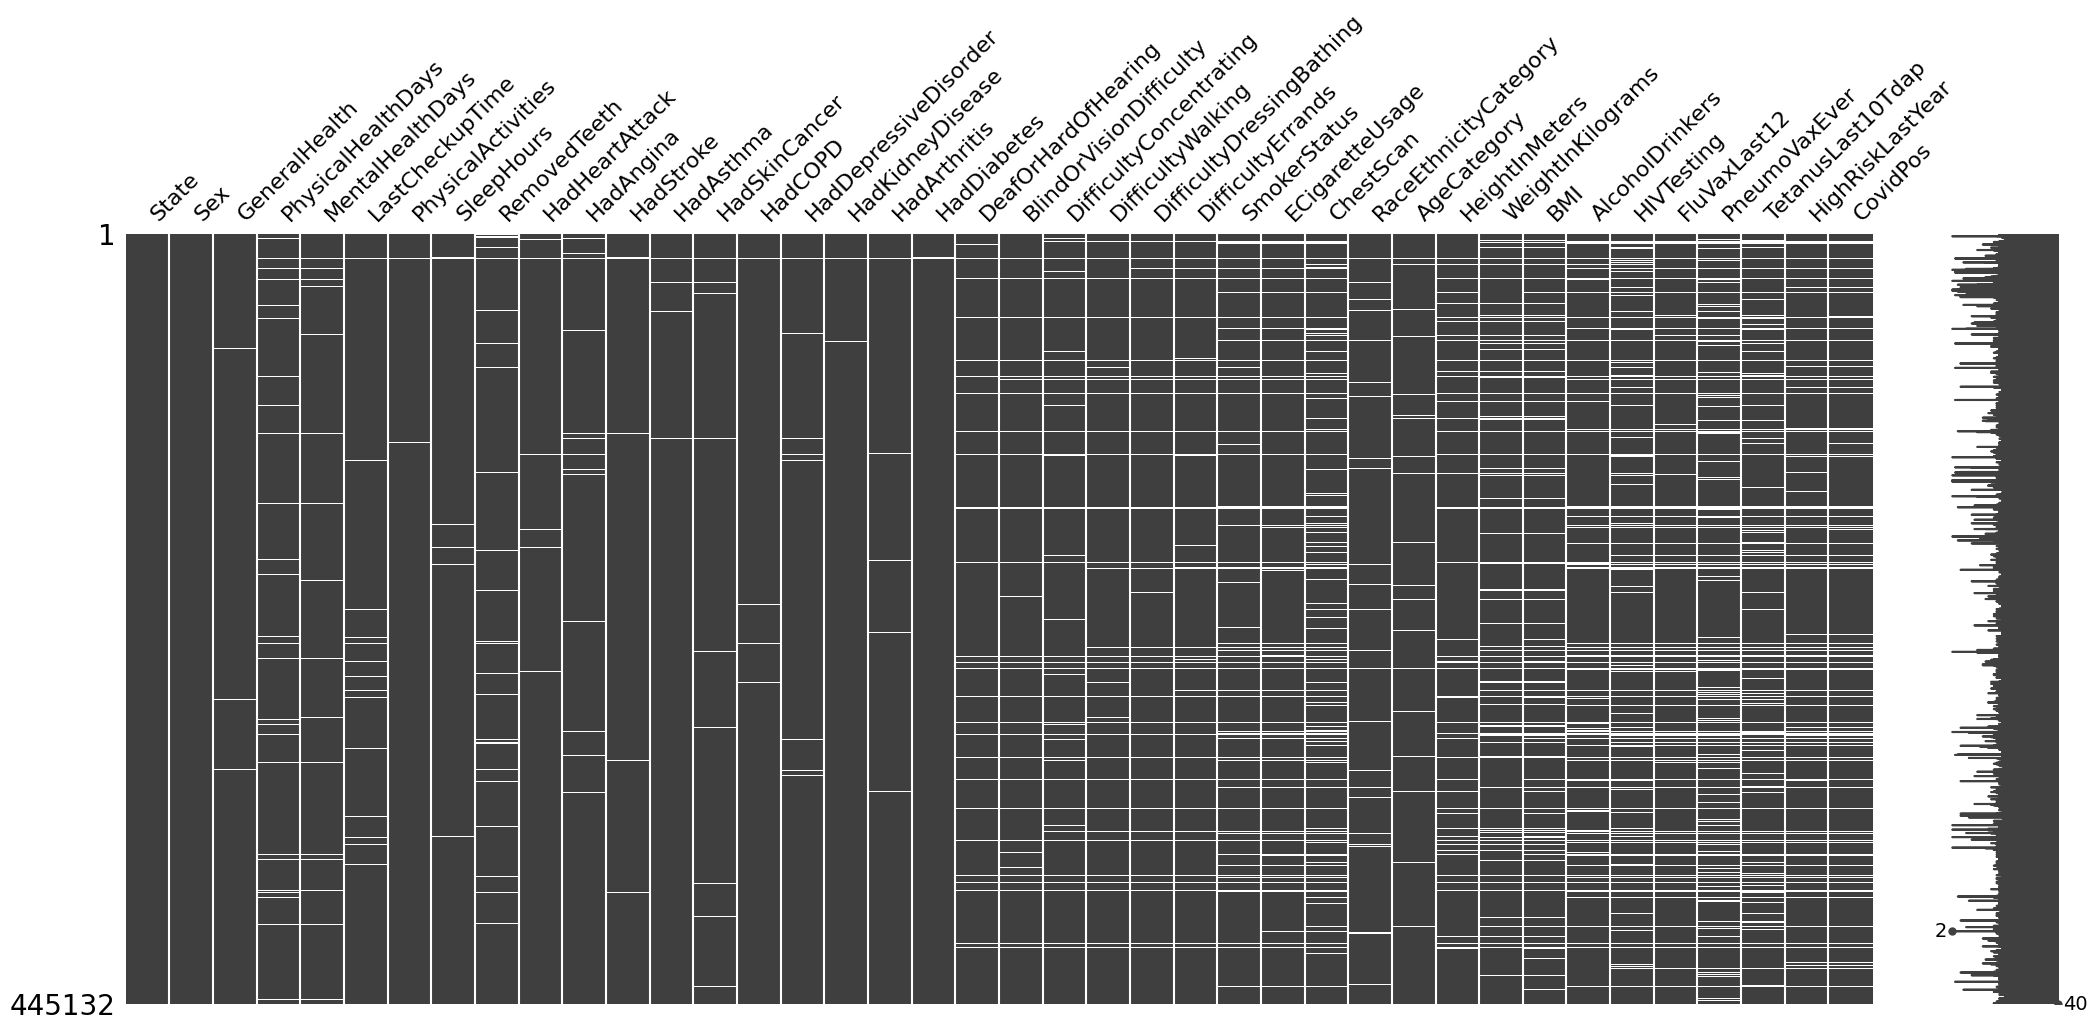

In [30]:
msno.matrix(health_df)

/Users/rohitnagotkar/Library/Mobile Documents/com~apple~CloudDocs/Mac Stuff/CPSC 5305 Intro to DS/.venv/lib/python3.12/site-packages/missingno/missingno.py:271: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels([int(n * len(df)) for n in ax1.get_yticks()], fontsize=fontsize)


<Axes: >

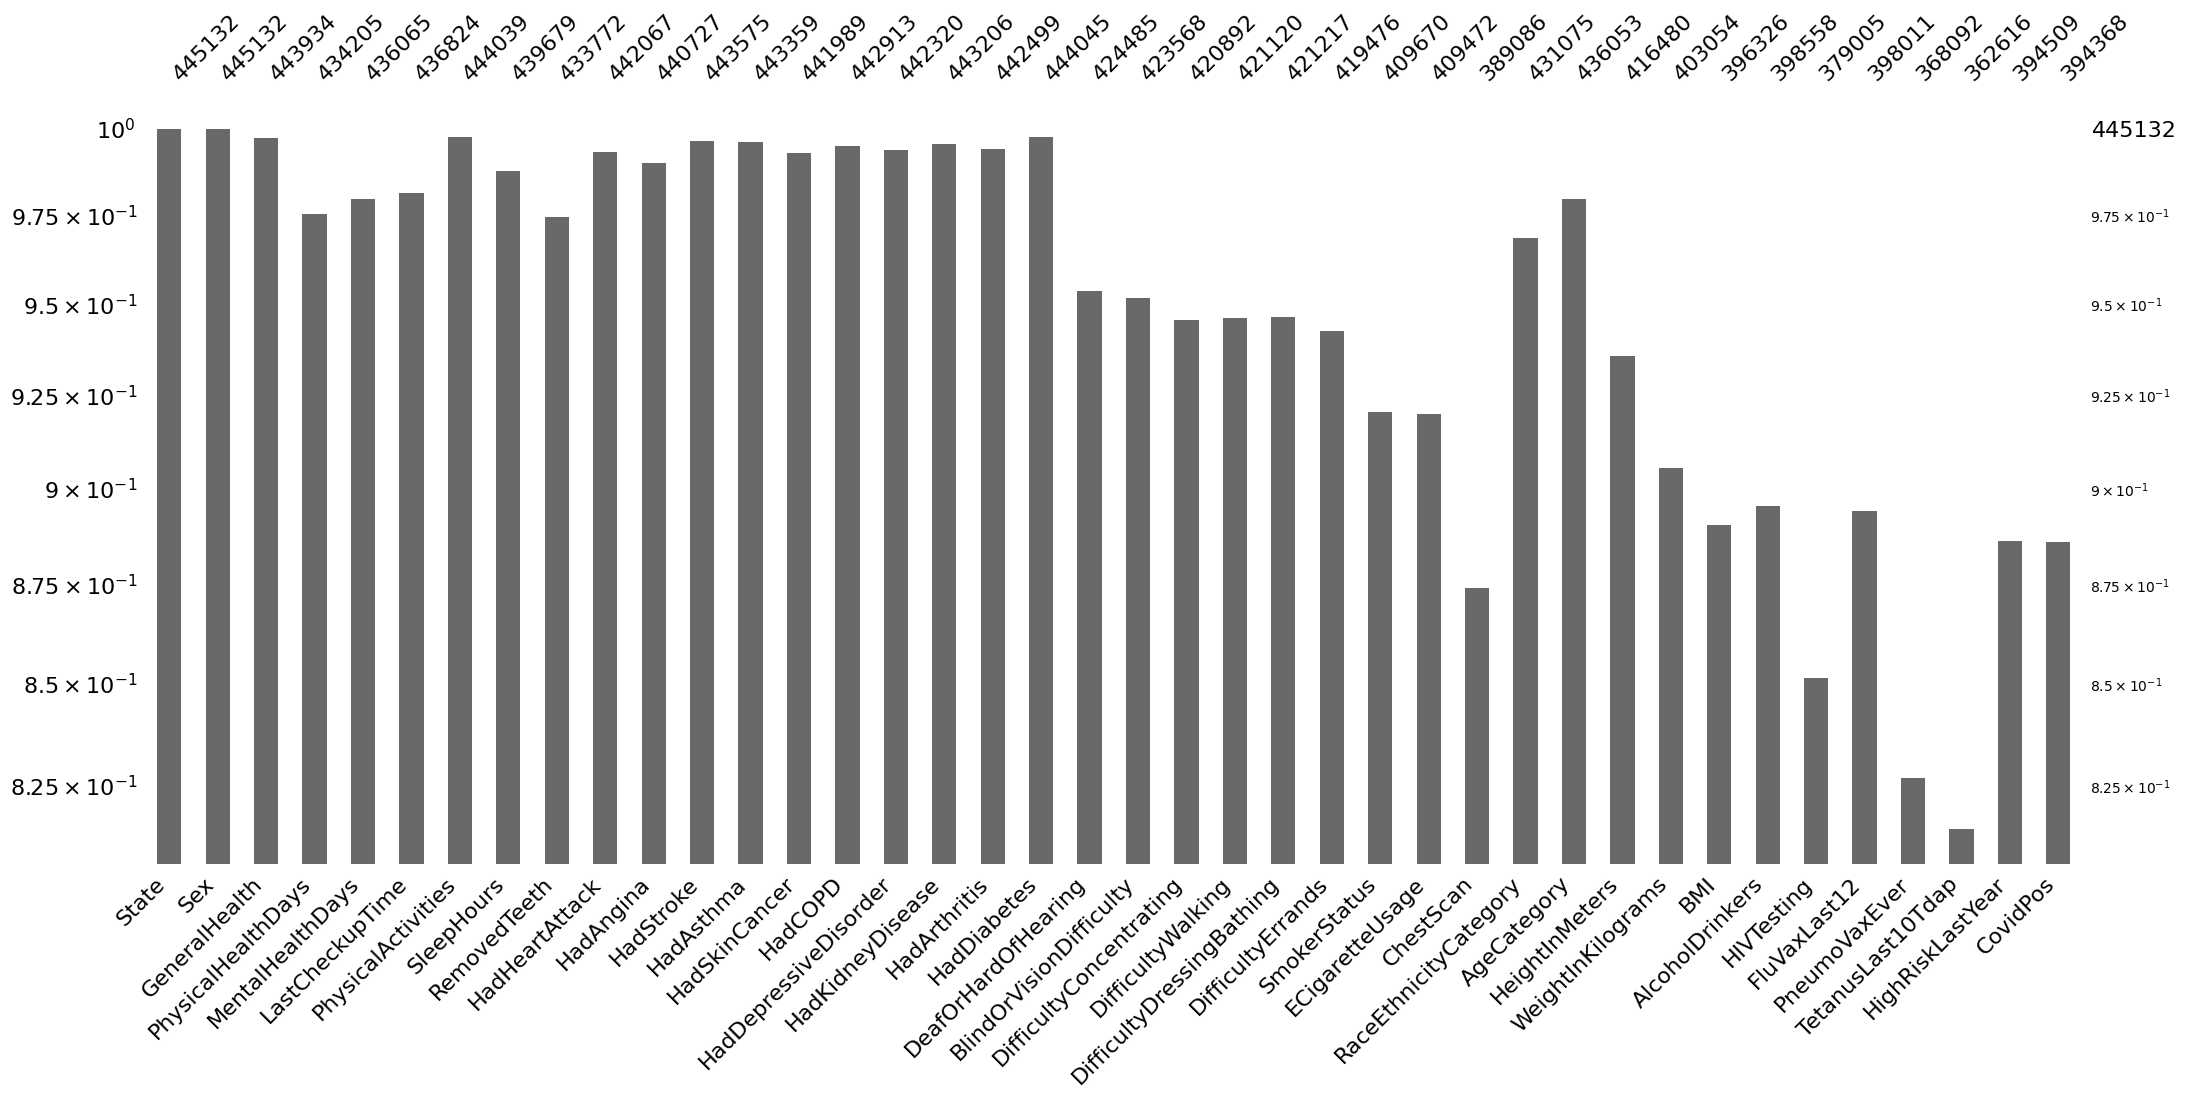

In [31]:
msno.bar(health_df, log=True)

<Axes: >

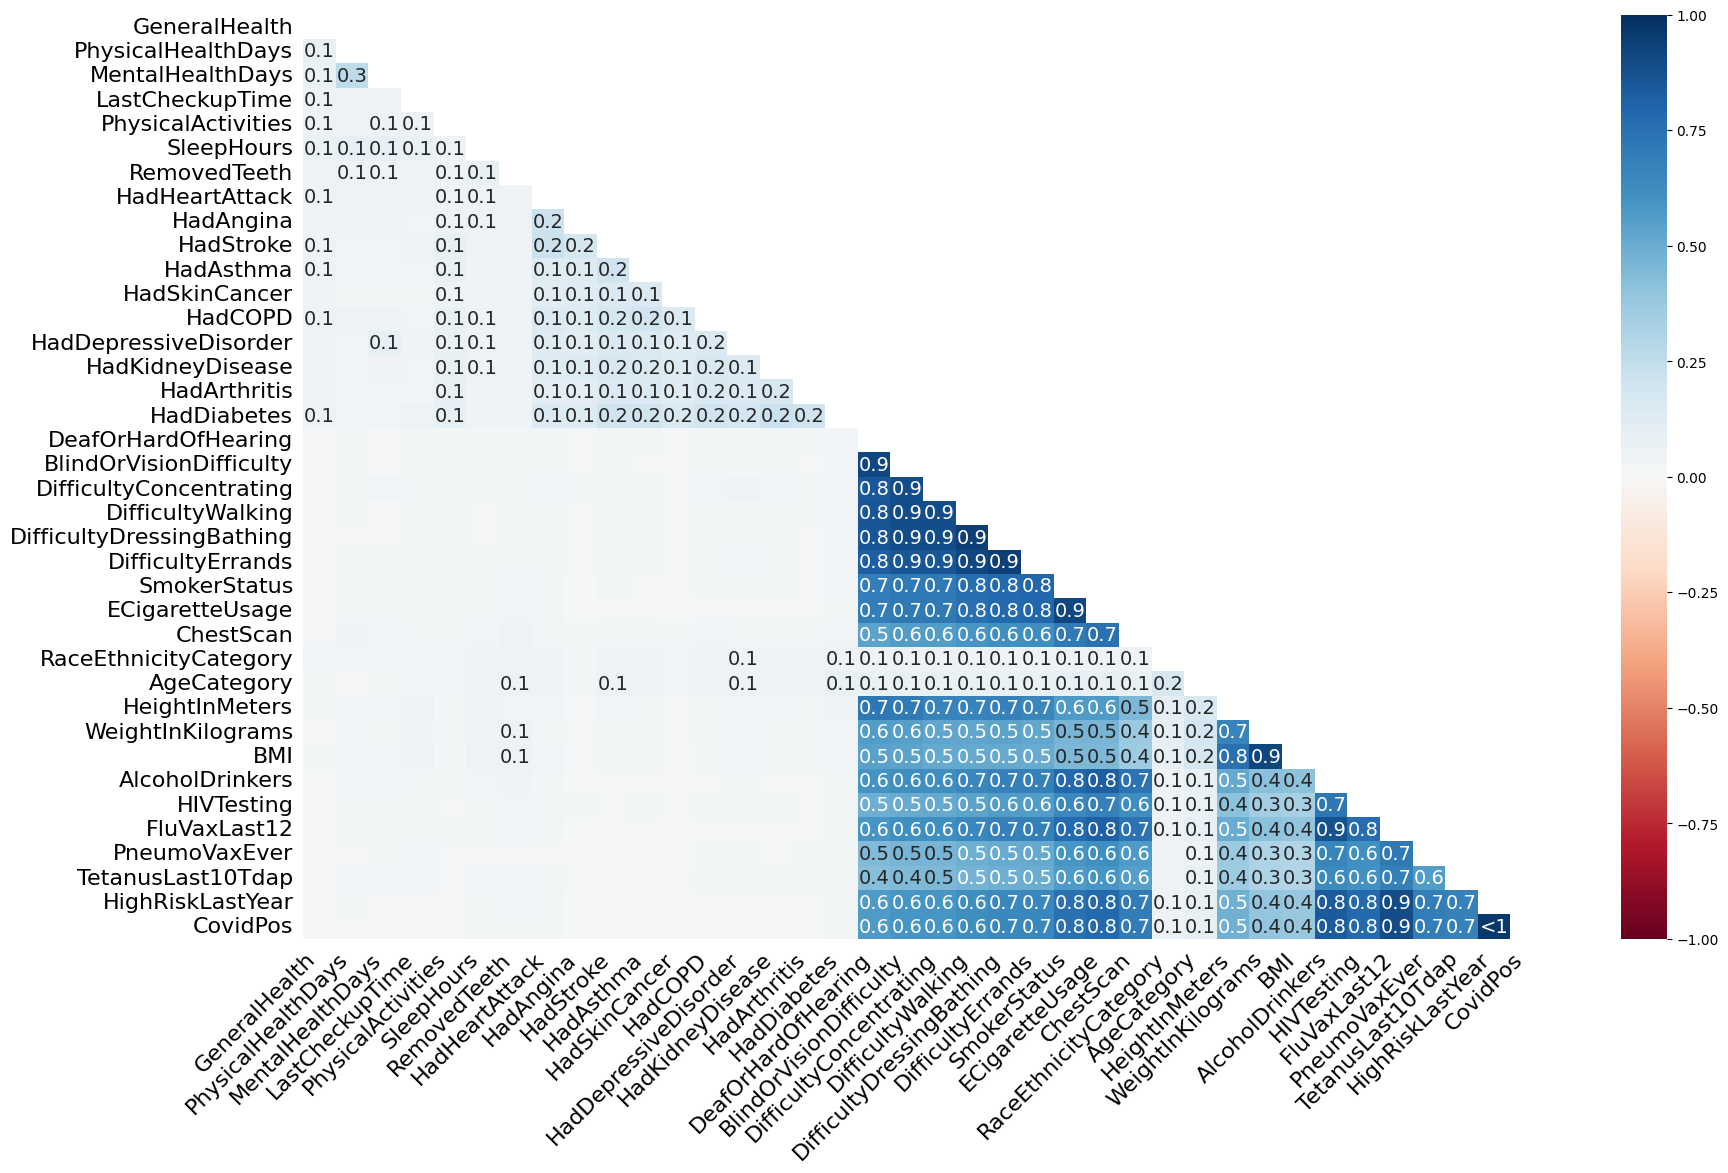

In [32]:
msno.heatmap(health_df)

# Data Cleaning

## Removed Duplicates

In [33]:
health_df_drop_dup = health_df.drop_duplicates()
health_df_drop_dup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 444975 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      444975 non-null  object 
 1   Sex                        444975 non-null  object 
 2   GeneralHealth              443782 non-null  object 
 3   PhysicalHealthDays         434053 non-null  float64
 4   MentalHealthDays           435913 non-null  float64
 5   LastCheckupTime            436674 non-null  object 
 6   PhysicalActivities         443887 non-null  object 
 7   SleepHours                 439527 non-null  float64
 8   RemovedTeeth               433620 non-null  object 
 9   HadHeartAttack             441915 non-null  object 
 10  HadAngina                  440575 non-null  object 
 11  HadStroke                  443423 non-null  object 
 12  HadAsthma                  443207 non-null  object 
 13  HadSkinCancer              441837 

## Remove null field values for our Label Column

In [ ]:
health_df_filtered = health_df_drop_dup.dropna(subset=['HadHeartAttack'])
print(health_df_filtered.info())

## Taking Necessary Columns

In [36]:
final_df = health_df_filtered[['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours',  'HadHeartAttack', 'HadAngina','HadStroke', 'HadAsthma',
        'HadCOPD','HadDepressiveDisorder',
       'HadDiabetes','DifficultyConcentrating', 'DifficultyWalking',
       'SmokerStatus','ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers','CovidPos']]

In [37]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 441915 entries, 0 to 445131
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   State                    441915 non-null  object 
 1   Sex                      441915 non-null  object 
 2   GeneralHealth            440820 non-null  object 
 3   PhysicalHealthDays       431318 non-null  float64
 4   MentalHealthDays         433123 non-null  float64
 5   LastCheckupTime          433876 non-null  object 
 6   PhysicalActivities       440943 non-null  object 
 7   SleepHours               436719 non-null  float64
 8   HadHeartAttack           441915 non-null  object 
 9   HadAngina                438327 non-null  object 
 10  HadStroke                440845 non-null  object 
 11  HadAsthma                440478 non-null  object 
 12  HadCOPD                  440077 non-null  object 
 13  HadDepressiveDisorder    439494 non-null  object 
 14  HadDiabet

# Converting Object to Numerical Data



In [40]:
onehotencoder = preprocessing.OneHotEncoder(sparse_output=False, handle_unknown='ignore')
le = preprocessing.LabelEncoder()

## Converting Ordinal Data

In [ ]:
# Sex = {"Male":0, "Female":1}
YesNoOrder= {"Yes":1, "No":0}
# AgeCategoryOrder = {}

OrdinalColumnsToReplace = {
    'GeneralHealth':{"Very good": 4, "Excellent":3,"Good":2,  "Fair":1,"Poor":0},
    'LastCheckupTime': {"Within past year (anytime less than 12 months ago)":3, "Within past 2 years (1 year but less than 2 years ago)": 2,
                  "Within past 5 years (2 years but less than 5 years ago)":1, "5 or more years ago":0 },
    "SmokerStatus":{"Current smoker - now smokes every day": 0, "Current smoker - now smokes some days":1, "Former smoker":2, "Never smoked":3 },
    "ECigaretteUsage":{"Use them every day":0,"Use them some days":1, "Not at all (right now)":2,"Never used e-cigarettes in my entire life": 3},
    "HadHeartAttack": YesNoOrder,'PhysicalActivities': YesNoOrder,
    'HadAngina': YesNoOrder, 'HadStroke': YesNoOrder,
    'HadAsthma': YesNoOrder, 'HadCOPD': YesNoOrder,
    'HadDepressiveDisorder': YesNoOrder,
     'DifficultyConcentrating': YesNoOrder,
    'DifficultyWalking': YesNoOrder, 'ChestScan': YesNoOrder,
    'AlcoholDrinkers': YesNoOrder
}

In [42]:
categorical_converted_df = final_df.replace(OrdinalColumnsToReplace)

/var/folders/ts/_c96jtzn74l3twms5892d8sr0000gn/T/ipykernel_52102/3639816243.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  categorical_converted_df = final_df.replace(OrdinalColumnsToReplace)


In [44]:
categorical_converted_df.tail()


,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,...,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,CovidPos
445127,Virgin Islands,Female,2.0,0.0,3.0,2.0,1.0,6.0,0,0.0,...,3.0,3.0,1.0,"Black only, Non-Hispanic",Age 18 to 24,1.65,69.85,25.63,NaN,Yes
445128,Virgin Islands,Female,3.0,2.0,2.0,3.0,1.0,7.0,0,0.0,...,3.0,3.0,0.0,"Black only, Non-Hispanic",Age 50 to 54,1.70,83.01,28.66,0.0,No
445129,Virgin Islands,Female,0.0,30.0,30.0,0.0,0.0,5.0,0,0.0,...,0.0,1.0,NaN,NaN,Age 65 to 69,1.70,49.90,17.23,NaN,No
445130,Virgin Islands,Male,4.0,0.0,0.0,3.0,0.0,5.0,1,0.0,...,3.0,3.0,1.0,"Black only, Non-Hispanic",Age 70 to 74,1.83,108.86,32.55,0.0,Yes
445131,Virgin Islands,Male,4.0,0.0,1.0,NaN,1.0,5.0,0,0.0,...,2.0,2.0,1.0,"Black only, Non-Hispanic",Age 40 to 44,1.68,63.50,22.60,1.0,No


## O.H.E. for Cardinal Data

Use OHE Encoder for :
 'Sex','PhysicalActivities',
        'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma',
       'HadCOPD', 'HadDepressiveDisorder', 'HadDiabetes',
       'DifficultyConcentrating', 'DifficultyWalking', 'ChestScan', 'RaceEthnicityCategory',
        'AlcoholDrinkers',
       'CovidPos'


In [45]:
ohe_converted_df = categorical_converted_df.copy(deep=True)
cardinal_columns = ['Sex', 'RaceEthnicityCategory','HadDiabetes','CovidPos']
ohe_converted_df[onehotencoder.get_feature_names_out()] = onehotencoder.fit_transform(categorical_converted_df[cardinal_columns])

In [46]:
ohe_converted_final_df = ohe_converted_df.drop(["Sex", "RaceEthnicityCategory","RaceEthnicityCategory_nan",'HadDiabetes','HadDiabetes_nan','CovidPos','CovidPos_nan'], axis=1)
ohe_converted_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 441915 entries, 0 to 445131
Data columns (total 37 columns):
 #   Column                                                                  Non-Null Count   Dtype  
---  ------                                                                  --------------   -----  
 0   State                                                                   441915 non-null  object 
 1   GeneralHealth                                                           440820 non-null  float64
 2   PhysicalHealthDays                                                      431318 non-null  float64
 3   MentalHealthDays                                                        433123 non-null  float64
 4   LastCheckupTime                                                         433876 non-null  float64
 5   PhysicalActivities                                                      440943 non-null  float64
 6   SleepHours                                                              4

In [ ]:
final_df = ohe_converted_final_df.copy(deep=True)
final_df2 = final_df.dropna(subset=["ChestScan"])
final_df2.HadHeartAttack.value_counts()

In [51]:
final_df2.shape

(386768, 37)

# Separate Yes and No DF

In [ ]:
# Create a df containing values for which "ChestScan" is not null and the label value is 0 (No). We chose "ChestScan" column as it had maximum missing values.
df_not_null_no = final_df[(final_df['HadHeartAttack']==0) & (~final_df["ChestScan"].isnull())]
# Create a df containing values for which the label value is 1(Yes)
df_yes = final_df[final_df['HadHeartAttack']==1]
df_yes.HadHeartAttack.value_counts()

## Count missing values for df_yes

In [55]:
for cols in df_yes.columns:
  print(cols)
  print("MISSING VALUES: ", df_yes[cols].isnull().sum())
  print('---------------------------------------------------------------------------------')


State
MISSING VALUES:  0
---------------------------------------------------------------------------------
GeneralHealth
MISSING VALUES:  113
---------------------------------------------------------------------------------
PhysicalHealthDays
MISSING VALUES:  962
---------------------------------------------------------------------------------
MentalHealthDays
MISSING VALUES:  703
---------------------------------------------------------------------------------
LastCheckupTime
MISSING VALUES:  329
---------------------------------------------------------------------------------
PhysicalActivities
MISSING VALUES:  91
---------------------------------------------------------------------------------
SleepHours
MISSING VALUES:  517
---------------------------------------------------------------------------------
HadHeartAttack
MISSING VALUES:  0
---------------------------------------------------------------------------------
HadAngina
MISSING VALUES:  1229
--------------------------------

## Count missing values for df_not_null_no

In [ ]:
df_not_null_no.isnull().sum()

State                                                                     0
GeneralHealth                                                             0
PhysicalHealthDays                                                        0
MentalHealthDays                                                          0
LastCheckupTime                                                           0
PhysicalActivities                                                        0
SleepHours                                                                0
HadHeartAttack                                                            0
HadAngina                                                                 0
HadStroke                                                                 0
HadAsthma                                                                 0
HadCOPD                                                                   0
HadDepressiveDisorder                                                     0
DifficultyCo

## Dropped null values for

In [58]:
df_not_null_no = df_not_null_no.dropna()

## Missingness matrix for df_yes

<Axes: >

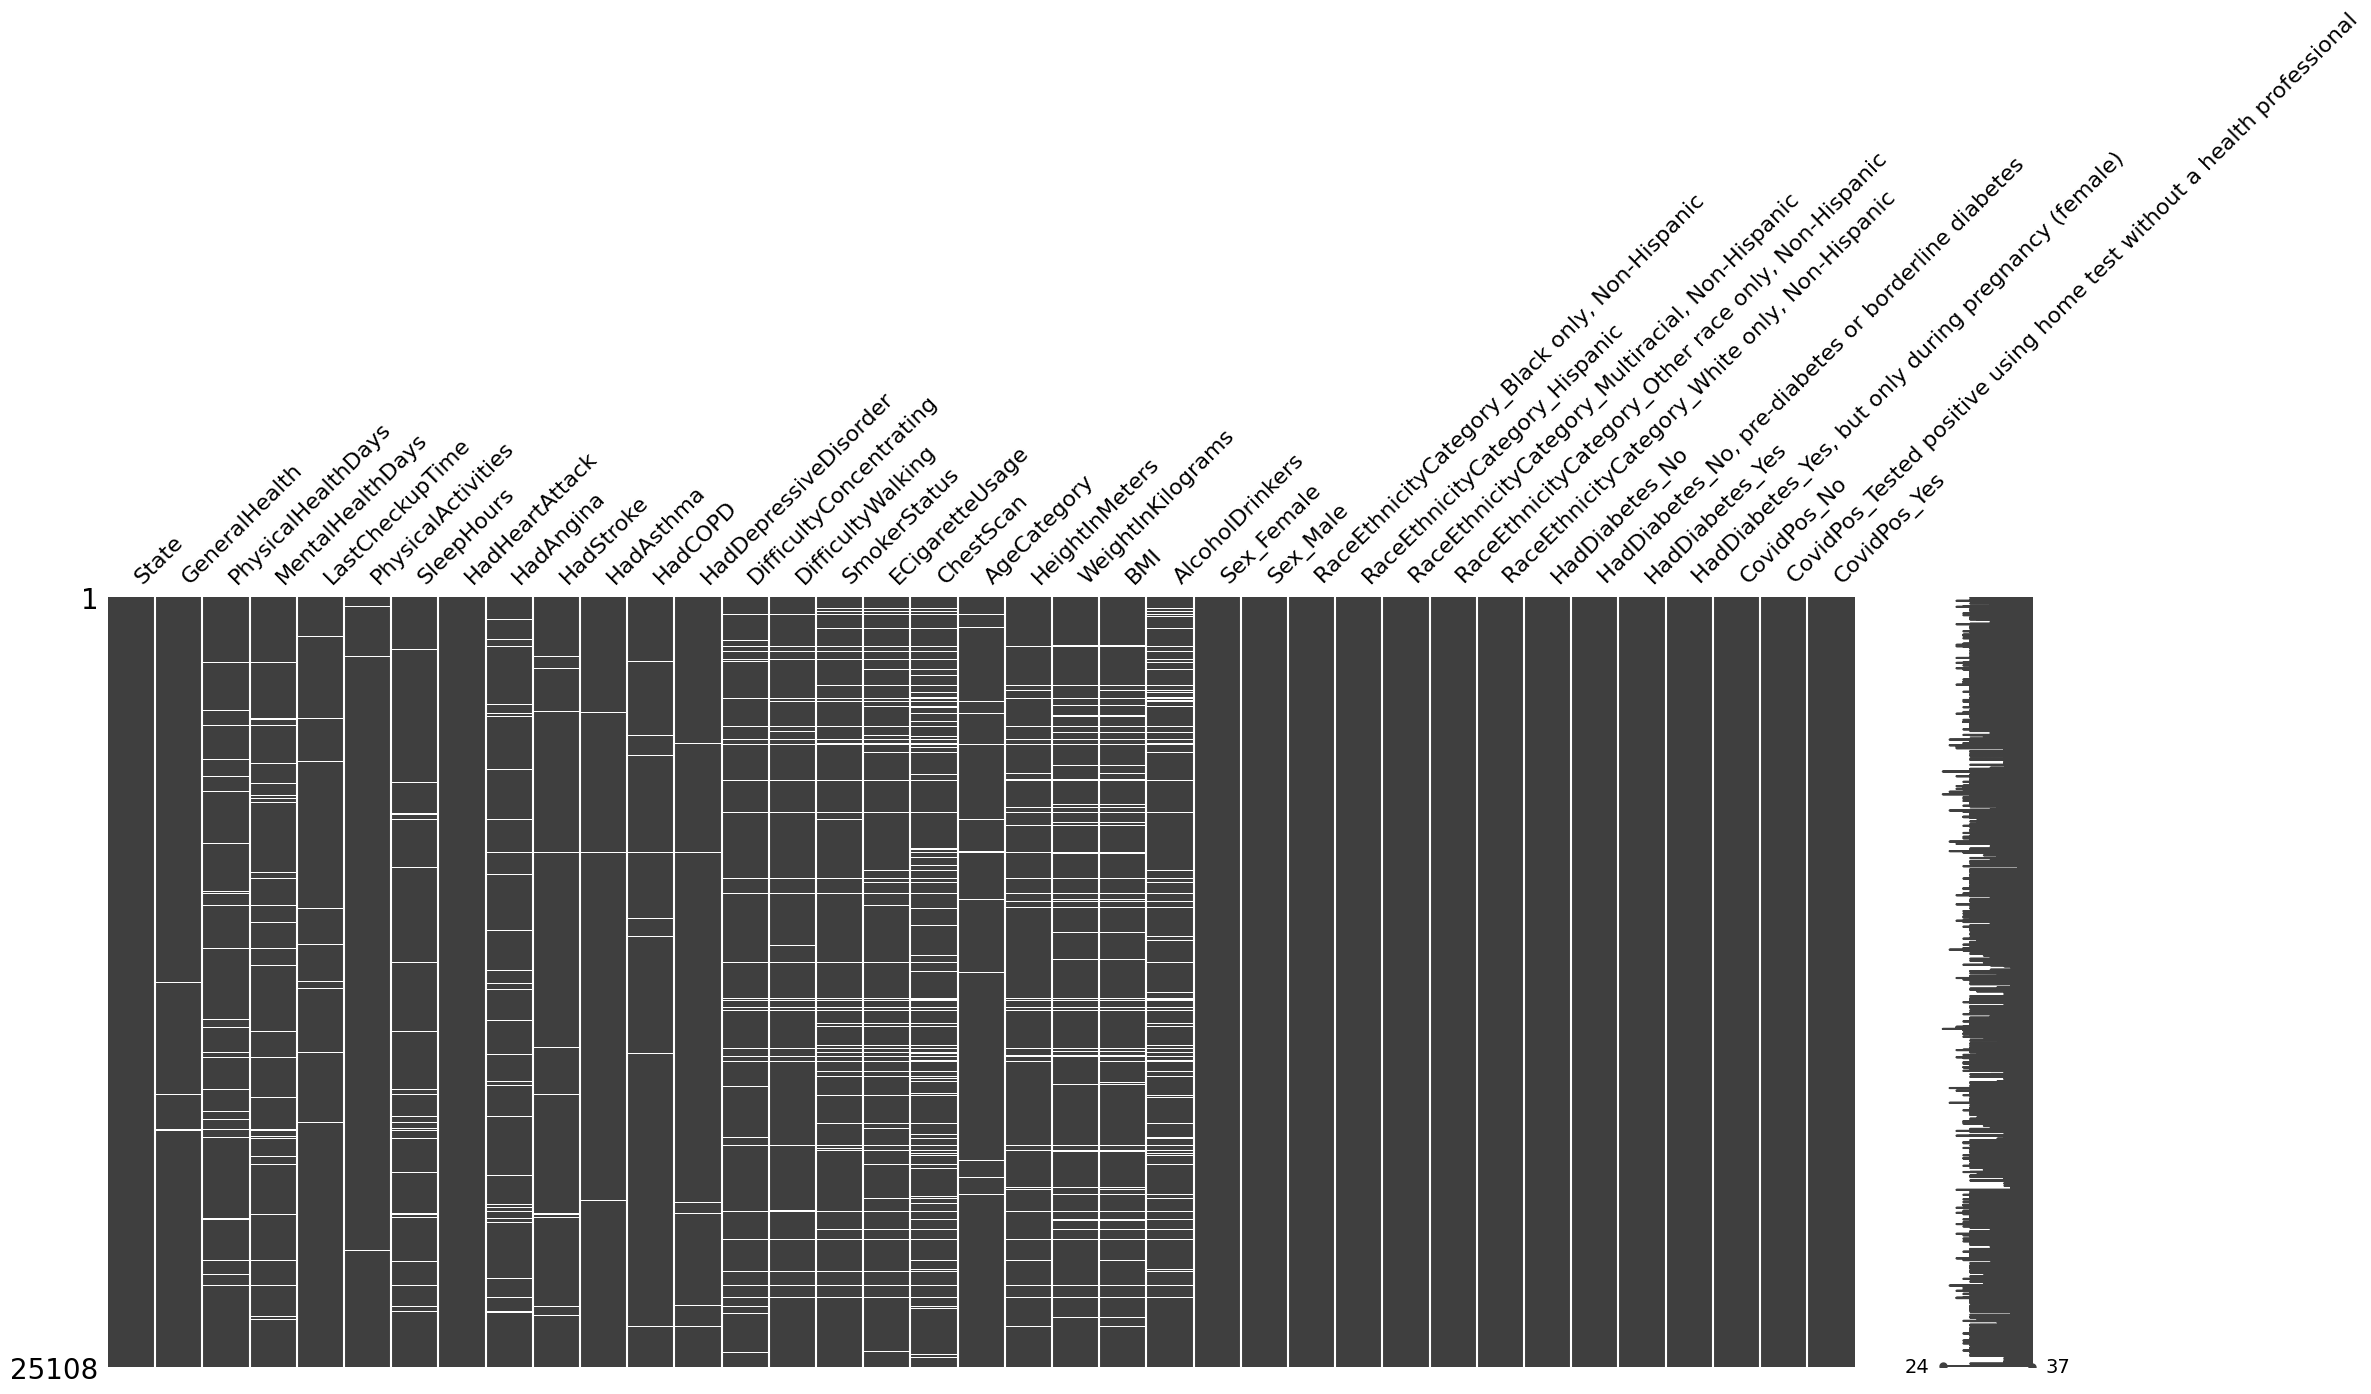

In [ ]:
msno.matrix(df_yes)

In [61]:
df_yes.head()

,State,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,...,"RaceEthnicityCategory_Multiracial, Non-Hispanic","RaceEthnicityCategory_Other race only, Non-Hispanic","RaceEthnicityCategory_White only, Non-Hispanic",HadDiabetes_No,"HadDiabetes_No, pre-diabetes or borderline diabetes",HadDiabetes_Yes,"HadDiabetes_Yes, but only during pregnancy (female)",CovidPos_No,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
5,Alabama,0.0,1.0,0.0,3.0,0.0,7.0,1,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
26,Alabama,1.0,23.0,3.0,3.0,1.0,8.0,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
31,Alabama,1.0,30.0,0.0,3.0,1.0,4.0,1,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
32,Alabama,0.0,14.0,14.0,3.0,0.0,6.0,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
34,Alabama,1.0,NaN,0.0,3.0,1.0,10.0,1,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [62]:
df_yes.columns

Index(['State', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
       'LastCheckupTime', 'PhysicalActivities', 'SleepHours', 'HadHeartAttack',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadCOPD',
       'HadDepressiveDisorder', 'DifficultyConcentrating', 'DifficultyWalking',
       'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'Sex_Female', 'Sex_Male',
       'RaceEthnicityCategory_Black only, Non-Hispanic',
       'RaceEthnicityCategory_Hispanic',
       'RaceEthnicityCategory_Multiracial, Non-Hispanic',
       'RaceEthnicityCategory_Other race only, Non-Hispanic',
       'RaceEthnicityCategory_White only, Non-Hispanic', 'HadDiabetes_No',
       'HadDiabetes_No, pre-diabetes or borderline diabetes',
       'HadDiabetes_Yes',
       'HadDiabetes_Yes, but only during pregnancy (female)', 'CovidPos_No',
       'CovidPos_Tested positive using home test without a health professio

# Imputing null values

In [63]:
df = df_yes.copy(deep=True)
mice_imputer = IterativeImputer()
# imputing the missing value with mice imputer
columns = ['GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
       'LastCheckupTime', 'PhysicalActivities', 'SleepHours', 'HadHeartAttack',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadCOPD',
       'HadDepressiveDisorder', 'DifficultyConcentrating',
       'DifficultyWalking', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan',
       'HeightInMeters', 'WeightInKilograms', 'BMI',
       'AlcoholDrinkers', ]
df[columns] = mice_imputer.fit_transform(df_yes[columns])

/Users/rohitnagotkar/Library/Mobile Documents/com~apple~CloudDocs/Mac Stuff/CPSC 5305 Intro to DS/.venv/lib/python3.12/site-packages/sklearn/impute/_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [64]:
df["AgeCategory"].mode()[0]

'Age 80 or older'

In [65]:
df["AgeCategory"] = df["AgeCategory"].fillna(df["AgeCategory"].mode()[0])

## Concatenate df_not_null_no and df

In [67]:
df_not_null_no.shape

(304757, 37)

In [68]:
preprocessed_df = pd.concat([df_not_null_no, df], axis=0)
preprocessed_df.shape

(329865, 37)

# EDA

1. AgeCategory vs HadHeartAttack "Bar/Hist"
2. State vs HadHeartAttack "Bar/Hist"
3. 'PhysicalHealthDays' & 'MentalHealthDays' vs HadHeartAttack
4. BMI & HadHeartAttack

Multivariate
1. Correlation Matrix

# Graphical EDA

## AgeCategory vs HadHeartAttack

/var/folders/ts/_c96jtzn74l3twms5892d8sr0000gn/T/ipykernel_52102/616930352.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="AgeCategory",y="HadHeartAttack",data=preprocessed_df,estimator=sum, ci=None, hue="State")


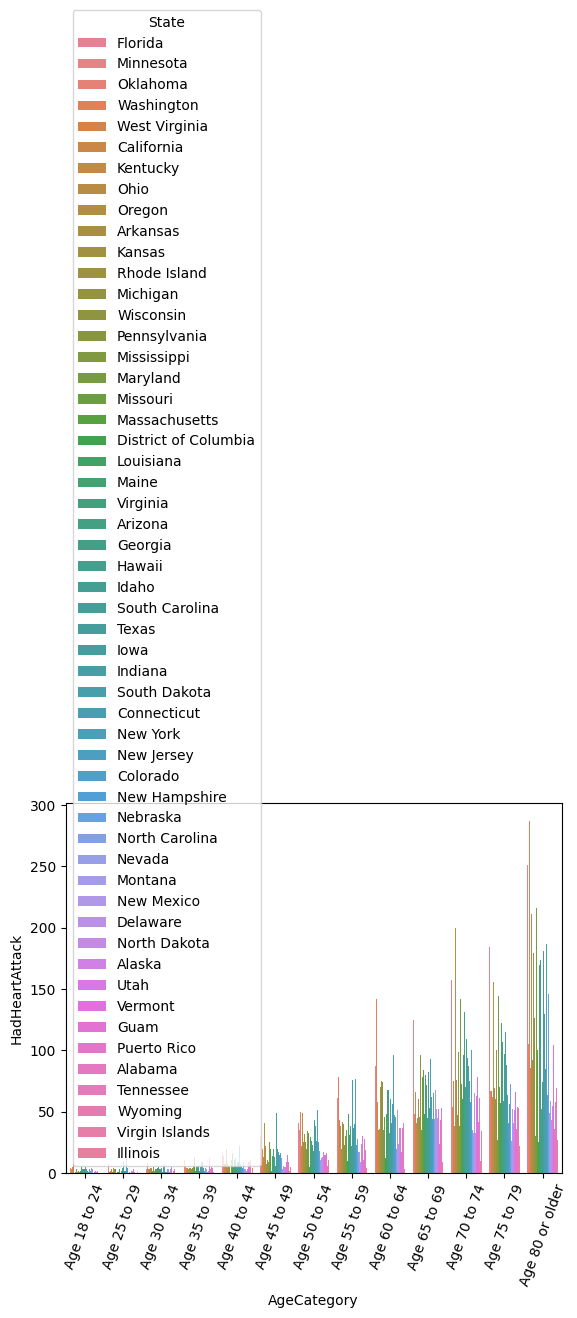

In [74]:
preprocessed_df.sort_values("AgeCategory", inplace = True)
sns.barplot(x="AgeCategory",y="HadHeartAttack",data=preprocessed_df,estimator=sum, ci=None, hue="State")
plt.xticks(rotation=70)
plt.show()

## State vs HadHeartAttack "Bar/Hist"

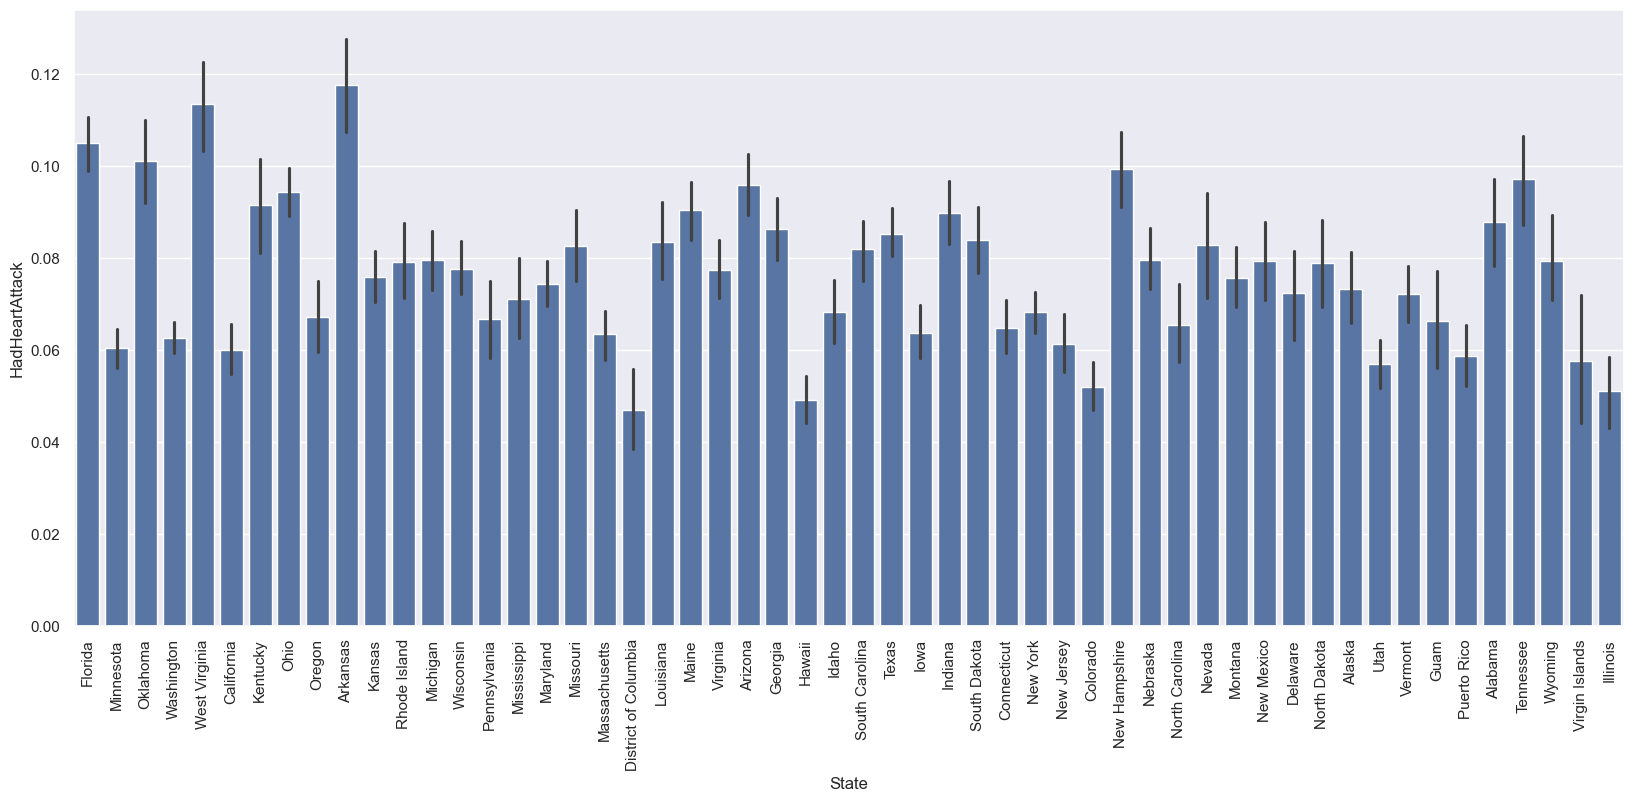

In [75]:
# setting the figure size
width = 20
height = 8
sns.set(rc = {'figure.figsize':(width,height)})
sns.barplot(x="State",y="HadHeartAttack",data=preprocessed_df )
plt.xticks(rotation=90)
plt.show()

## BMI & HadHeartAttack

Text(0, 0.5, 'HadHeartAttack')

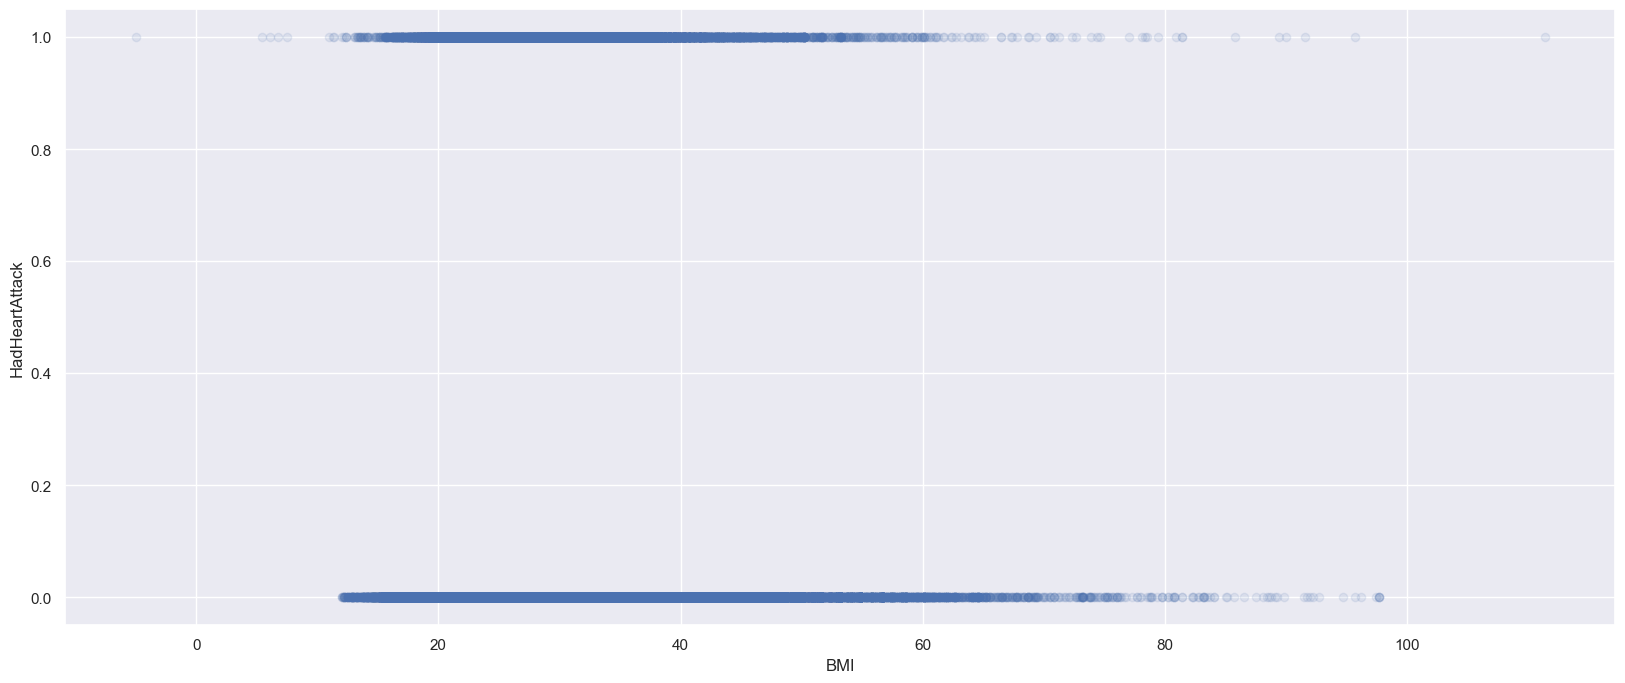

In [76]:
plt.scatter(preprocessed_df.BMI, preprocessed_df.HadHeartAttack, alpha=0.1)
plt.xlabel("BMI")
plt.ylabel("HadHeartAttack")

## 'PhysicalHealthDays' & 'MentalHealthDays' vs HadHeartAttack

Text(0.5, 1.0, 'Boxplot of numerical values')

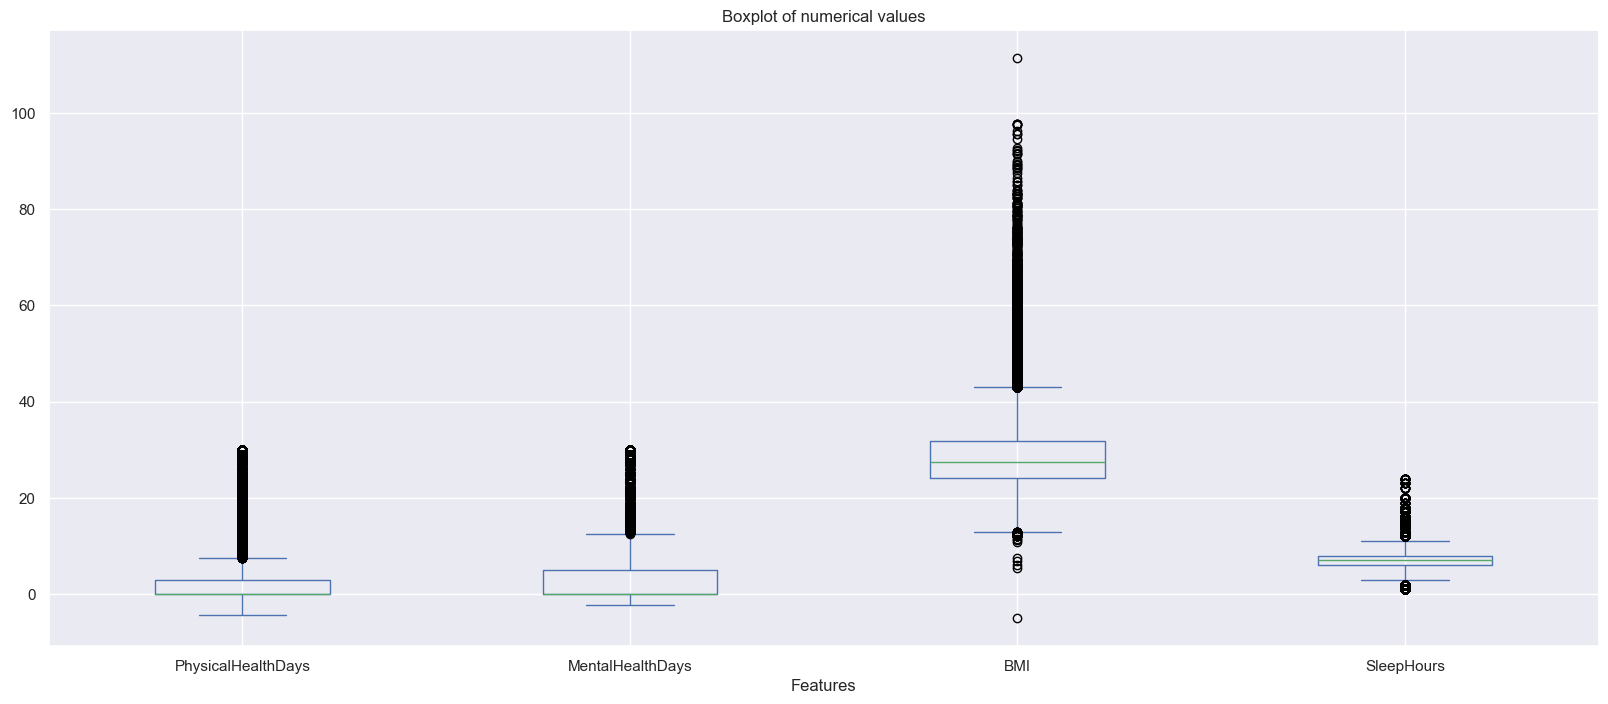

In [ ]:

preprocessed_df[['PhysicalHealthDays','MentalHealthDays',"BMI","SleepHours"]].plot(kind="box")
plt.xlabel("Features")
plt.title("Boxplot of numerical values")

## Correlation

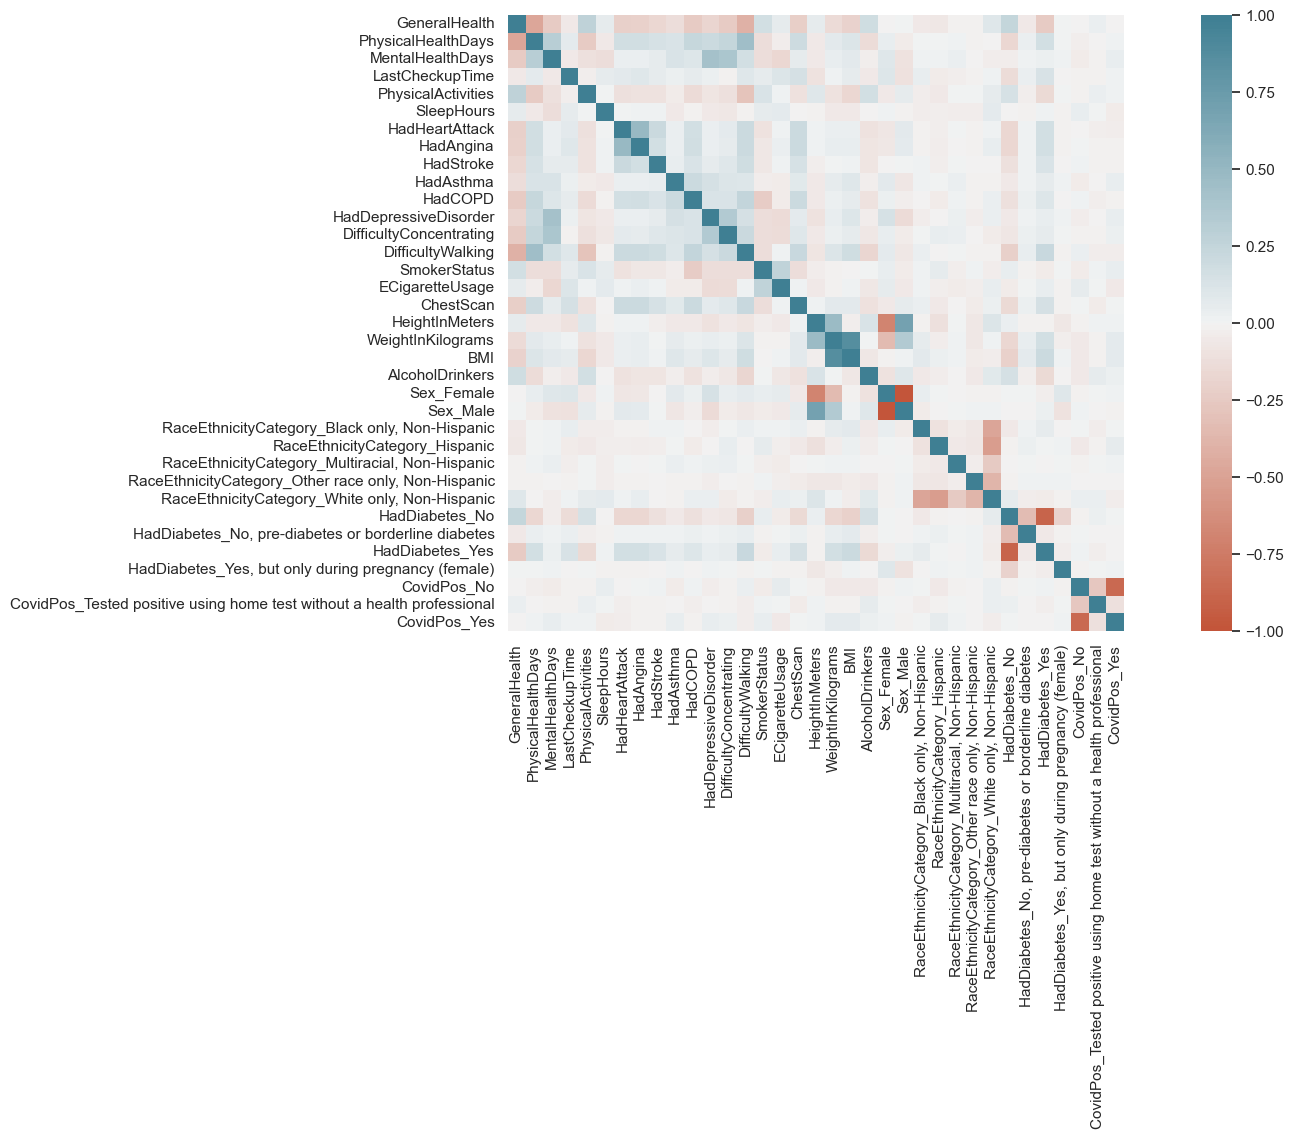

In [100]:
corr = preprocessed_df.corr(numeric_only=True)
sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
plt.show()

# Non-Graphical EDA

## 1. describe() for numerical data

In [79]:
preprocessed_df.describe()

,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,...,"RaceEthnicityCategory_Multiracial, Non-Hispanic","RaceEthnicityCategory_Other race only, Non-Hispanic","RaceEthnicityCategory_White only, Non-Hispanic",HadDiabetes_No,"HadDiabetes_No, pre-diabetes or borderline diabetes",HadDiabetes_Yes,"HadDiabetes_Yes, but only during pregnancy (female)",CovidPos_No,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
count,329865.000000,329865.000000,329865.000000,329865.000000,329865.000000,329865.000000,329865.000000,329865.000000,329865.000000,329865.000000,...,329865.000000,329865.000000,329865.000000,329865.000000,329865.000000,329865.000000,329865.000000,329865.000000,329865.000000,329865.000000
mean,2.642797,4.308136,4.341561,2.656604,0.772817,7.021521,0.076116,0.070113,0.044907,0.150775,...,0.022158,0.049096,0.741616,0.828724,0.022630,0.139354,0.008161,0.660131,0.034278,0.277589
std,1.199654,8.600641,8.270274,0.777513,0.418942,1.462387,0.265184,0.253580,0.206845,0.357751,...,0.147196,0.216068,0.437747,0.376751,0.148723,0.346316,0.089969,0.473665,0.181942,0.447810
min,-0.258960,-4.255814,-2.235624,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,3.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,3.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,4.000000,3.000000,5.000000,3.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,4.000000,30.000000,30.000000,3.086967,1.000000,24.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 2. describe() for object data

In [80]:
preprocessed_df.describe(include = object)

,State,AgeCategory
count,329865,329865
unique,54,13
top,Washington,Age 65 to 69
freq,19645,36510


## 3. Median



In [81]:
preprocessed_df =  preprocessed_df.sort_values(by = "BMI", ascending = True)
print("Yes",preprocessed_df[preprocessed_df["HadHeartAttack"] == 1].BMI.median())
print("No",preprocessed_df[preprocessed_df["HadHeartAttack"] == 0].BMI.median())


Yes 28.869193643348876
No 27.44


## 4. Mean

In [82]:

print("Yes",preprocessed_df[preprocessed_df["HadHeartAttack"] == 1].BMI.mean())
print("No",preprocessed_df[preprocessed_df["HadHeartAttack"] == 0].BMI.mean())

Yes 29.320741395594297
No 28.53031474256539


## 5. Mode

In [83]:

print("Yes",preprocessed_df[preprocessed_df["HadHeartAttack"] == 1].BMI.mode()[0])
print("No",preprocessed_df[preprocessed_df["HadHeartAttack"] == 0].BMI.mode()[0])

Yes 26.63
No 26.63


# Downsampling


In [84]:
print(preprocessed_df["HadHeartAttack"].value_counts(),preprocessed_df["HadHeartAttack"].value_counts()/preprocessed_df.shape[0]*100)

HadHeartAttack
0.0    304757
1.0     25108
Name: count, dtype: int64 HadHeartAttack
0.0    92.388401
1.0     7.611599
Name: count, dtype: float64


In [85]:
df_majority = preprocessed_df[preprocessed_df["HadHeartAttack"]==0]
print("Majority",df_majority.shape)
df_minority = preprocessed_df[preprocessed_df["HadHeartAttack"]==1]
print("Minority",df_minority.shape)

Majority (304757, 37)
Minority (25108, 37)


## Downsampling the majority class (No)

In [86]:
df_majority_downsampled = resample(df_majority, replace=False, n_samples=int(0.5*df_majority.shape[0]), random_state = 42)
print("Majority downsampled",df_majority_downsampled.shape)
df_majority_downsampled.head()

Majority downsampled (152378, 37)


,State,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,...,"RaceEthnicityCategory_Multiracial, Non-Hispanic","RaceEthnicityCategory_Other race only, Non-Hispanic","RaceEthnicityCategory_White only, Non-Hispanic",HadDiabetes_No,"HadDiabetes_No, pre-diabetes or borderline diabetes",HadDiabetes_Yes,"HadDiabetes_Yes, but only during pregnancy (female)",CovidPos_No,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
166320,Maryland,4.0,1.0,15.0,3.0,1.0,11.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
417023,West Virginia,4.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
145179,Maine,2.0,3.0,0.0,3.0,0.0,8.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
275208,New York,2.0,0.0,0.0,3.0,1.0,7.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
87477,Hawaii,4.0,0.0,0.0,3.0,1.0,8.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


## Upsampling

In [87]:
df_minority_upsampled = resample(df_minority, replace=True, n_samples=int(0.5*df_majority.shape[0]), random_state=42)
print("Minority Upsampled",df_minority_upsampled.shape)
df_minority_upsampled.head()

Minority Upsampled (152378, 37)


,State,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,...,"RaceEthnicityCategory_Multiracial, Non-Hispanic","RaceEthnicityCategory_Other race only, Non-Hispanic","RaceEthnicityCategory_White only, Non-Hispanic",HadDiabetes_No,"HadDiabetes_No, pre-diabetes or borderline diabetes",HadDiabetes_Yes,"HadDiabetes_Yes, but only during pregnancy (female)",CovidPos_No,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
143915,Louisiana,0.0,20.0,0.0,3.0,0.0,7.173464,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
191097,Michigan,1.0,2.0,7.0,3.0,0.0,5.000000,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4395,Alabama,4.0,0.0,0.0,3.0,1.0,7.366909,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
103698,Illinois,1.0,12.0,0.0,3.0,0.0,4.000000,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
15008,Arizona,2.0,0.0,0.0,3.0,1.0,8.000000,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [88]:
# Combine the sampled classes
sampled_df = pd.concat([df_majority_downsampled, df_minority_upsampled])
sampled_df = sampled_df.sort_index().reset_index().drop("index",axis=1)
sampled_df.head()

,State,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,...,"RaceEthnicityCategory_Multiracial, Non-Hispanic","RaceEthnicityCategory_Other race only, Non-Hispanic","RaceEthnicityCategory_White only, Non-Hispanic",HadDiabetes_No,"HadDiabetes_No, pre-diabetes or borderline diabetes",HadDiabetes_Yes,"HadDiabetes_Yes, but only during pregnancy (female)",CovidPos_No,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
0,Alabama,4.0,2.0,3.0,3.0,1.0,5.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Alabama,0.0,1.0,0.0,3.0,0.0,7.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,Alabama,0.0,1.0,0.0,3.0,0.0,7.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,Alabama,0.0,1.0,0.0,3.0,0.0,7.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,Alabama,0.0,1.0,0.0,3.0,0.0,7.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


# Binary Encoding on "State" column

In [89]:
encoder = BinaryEncoder(cols=["State"], drop_invariant=True)
encoder.fit(sampled_df)
sampled_df_enc = encoder.transform(sampled_df)
sampled_df_enc.head()

,State_0,State_1,State_2,State_3,State_4,State_5,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,...,"RaceEthnicityCategory_Multiracial, Non-Hispanic","RaceEthnicityCategory_Other race only, Non-Hispanic","RaceEthnicityCategory_White only, Non-Hispanic",HadDiabetes_No,"HadDiabetes_No, pre-diabetes or borderline diabetes",HadDiabetes_Yes,"HadDiabetes_Yes, but only during pregnancy (female)",CovidPos_No,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
0,0,0,0,0,0,1,4.0,2.0,3.0,3.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0,0,0,1,0.0,1.0,0.0,3.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0,0,0,0,0,1,0.0,1.0,0.0,3.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0,0,0,0,0,1,0.0,1.0,0.0,3.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0,0,0,0,0,1,0.0,1.0,0.0,3.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


##Label encoding on "AgeCategory" column

In [90]:
labelencoder = LabelEncoder()
sampled_df_enc['AgeCategory'] = labelencoder.fit_transform(sampled_df_enc['AgeCategory'])
sampled_df_enc['AgeCategory'].unique()

array([ 7, 12, 10, 11,  9,  8,  5,  6,  4,  3,  1,  2,  0])

## Train Test Split

### Defining X and y

In [91]:
final_df = sampled_df_enc
final_df.columns

Index(['State_0', 'State_1', 'State_2', 'State_3', 'State_4', 'State_5',
       'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
       'LastCheckupTime', 'PhysicalActivities', 'SleepHours', 'HadHeartAttack',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadCOPD',
       'HadDepressiveDisorder', 'DifficultyConcentrating', 'DifficultyWalking',
       'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'Sex_Female', 'Sex_Male',
       'RaceEthnicityCategory_Black only, Non-Hispanic',
       'RaceEthnicityCategory_Hispanic',
       'RaceEthnicityCategory_Multiracial, Non-Hispanic',
       'RaceEthnicityCategory_Other race only, Non-Hispanic',
       'RaceEthnicityCategory_White only, Non-Hispanic', 'HadDiabetes_No',
       'HadDiabetes_No, pre-diabetes or borderline diabetes',
       'HadDiabetes_Yes',
       'HadDiabetes_Yes, but only during pregnancy (female)', 'CovidPos_No',
       'Cov

In [101]:

# Define the feature columns and target variable
feature_columns = [
       'State_0', 'State_1', 'State_2', 'State_3', 'State_4', 'State_5',
       'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
       'LastCheckupTime', 'PhysicalActivities', 'SleepHours',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadCOPD',
       'HadDepressiveDisorder', 'DifficultyConcentrating', 'DifficultyWalking',
       'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'Sex_Female', 'Sex_Male',
       'RaceEthnicityCategory_Black only, Non-Hispanic',
       'RaceEthnicityCategory_Hispanic',
       'RaceEthnicityCategory_Multiracial, Non-Hispanic',
       'RaceEthnicityCategory_Other race only, Non-Hispanic',
       'RaceEthnicityCategory_White only, Non-Hispanic', 'HadDiabetes_No',
       'HadDiabetes_No, pre-diabetes or borderline diabetes',
       'HadDiabetes_Yes',
       'HadDiabetes_Yes, but only during pregnancy (female)', 'CovidPos_No',
       'CovidPos_Tested positive using home test without a health professional',
       'CovidPos_Yes'
]

X = final_df[feature_columns]
y = final_df['HadHeartAttack']

### Splitting data into train and test

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21, stratify = y)

In [94]:
print("Train X:",X_train.shape,"Train Y:",y_train.shape,"Test X:",X_test.shape,"Test Y:",y_test.shape)

Train X: (243804, 41) Train Y: (243804,) Test X: (60952, 41) Test Y: (60952,)


## 1. K-Nearest Neighbors

Reference: https://www.geeksforgeeks.org/ml-implementation-of-knn-classifier-using-sklearn/

In [95]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243804 entries, 280355 to 229890
Data columns (total 41 columns):
 #   Column                                                                  Non-Null Count   Dtype  
---  ------                                                                  --------------   -----  
 0   State_0                                                                 243804 non-null  int64  
 1   State_1                                                                 243804 non-null  int64  
 2   State_2                                                                 243804 non-null  int64  
 3   State_3                                                                 243804 non-null  int64  
 4   State_4                                                                 243804 non-null  int64  
 5   State_5                                                                 243804 non-null  int64  
 6   GeneralHealth                                                       

## Training the model


## a) Using thumb rule to chose K value and train the model

In [96]:
k = int(math.sqrt(X_train.shape[0]))

clf = KNeighborsClassifier(n_neighbors = k)
clf.fit(X_train, y_train)

training_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
y_pred = clf.predict(X_test)

scores_knn = [training_score, test_score]

In [97]:
print("Training and Test scores: ",scores_knn)

Training and Test scores:  [0.7474159570802776, 0.743585116156976]


## b) Using Cross Validation GridSearchCV to use best K-Value

In [98]:
# param_grid = {'n_neighbors': range(2,22)}
# k = int(math.sqrt(X_train.shape[0]))

# knn = KNeighborsClassifier(n_neighbors = k)

# grid_search = GridSearchCV(knn, param_grid, cv = 5)

# grid_search.fit(X_train, y_train)

# print("Optimal value of n_neighbors: ", grid_search.best_params_['n_neighbors'])

## Using K =17, train the model

In [ ]:
k = 17

clf = KNeighborsClassifier(n_neighbors = k)
clf.fit(X_train, y_train)

training_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
y_pred = clf.predict(X_test)

scores_knn = [training_score, test_score]

print("Training and Test scores: ",scores_knn)

Training and Test scores:  [0.8156264868500926, 0.7919838561491009]


In [ ]:
k = 2

clf = KNeighborsClassifier(n_neighbors = k)
clf.fit(X_train, y_train)

training_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
y_pred = clf.predict(X_test)

scores_knn = [training_score, test_score]

print("Training and Test scores: ",scores_knn)

Training and Test scores:  [0.9975800232974028, 0.9360316314476965]


In [ ]:
k = 10


clf = KNeighborsClassifier(n_neighbors = k)
clf.fit(X_train, y_train)

training_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
y_pred = clf.predict(X_test)

scores_knn = [training_score, test_score]

print("Training and Test scores: ",scores_knn)

Training and Test scores:  [0.8515487850896621, 0.8098831867699173]


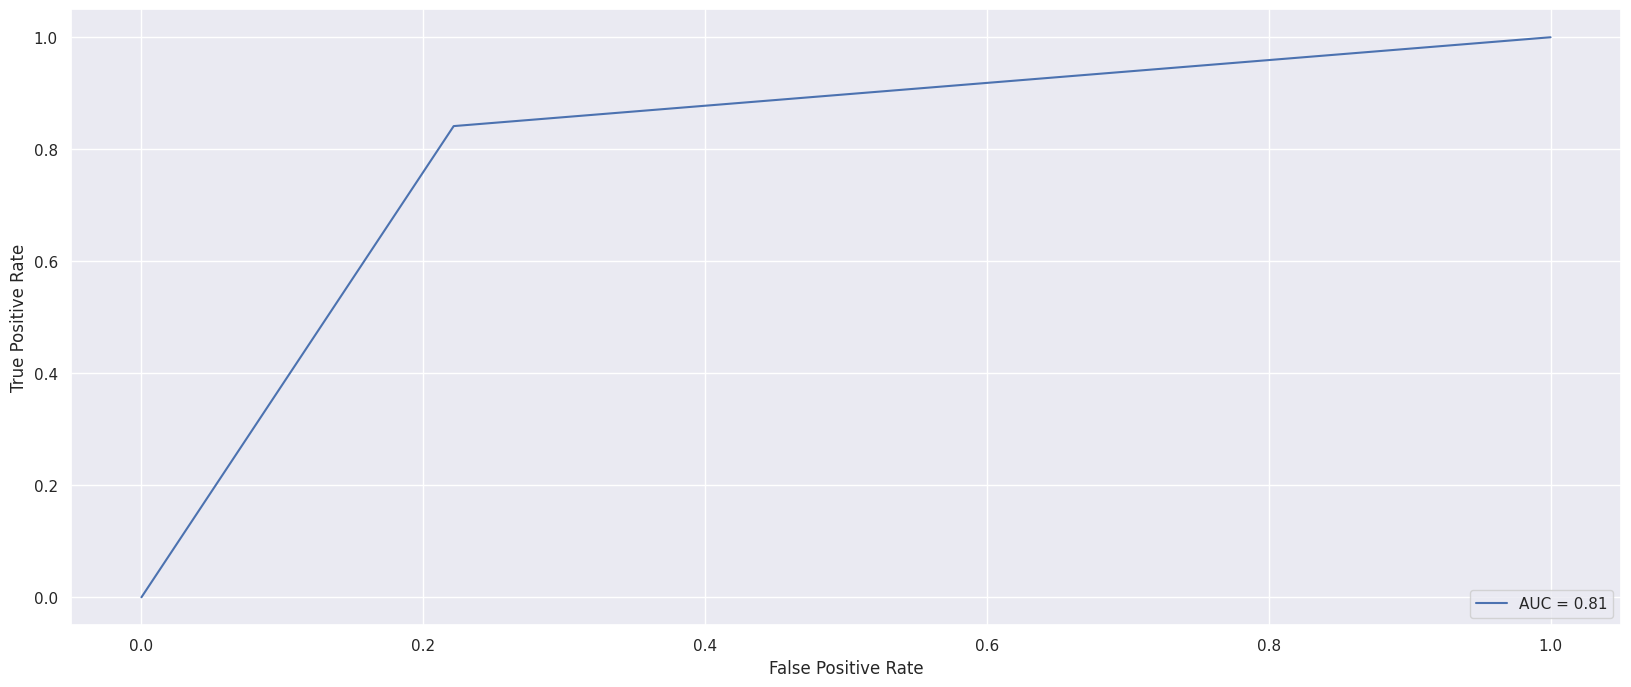

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
# plt.title("ROC-AUC curve for KNN")
display.plot()

In [ ]:
logreg = LogisticRegression(random_state = 16,C= 0.1, penalty= 'l2', solver= 'liblinear')
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_log)
cnf_matrix

array([[25894,  4582],
       [ 6549, 23927]])

In [ ]:
target_names = ['Not Heart Attack','Had Heart Attack']
print(classification_report(y_test, y_pred_log, target_names=target_names))

                  precision    recall  f1-score   support

Not Heart Attack       0.80      0.85      0.82     30476
Had Heart Attack       0.84      0.79      0.81     30476

        accuracy                           0.82     60952
       macro avg       0.82      0.82      0.82     60952
    weighted avg       0.82      0.82      0.82     60952



Text(0.5, 709.5555555555555, 'Predicted\xa0label')

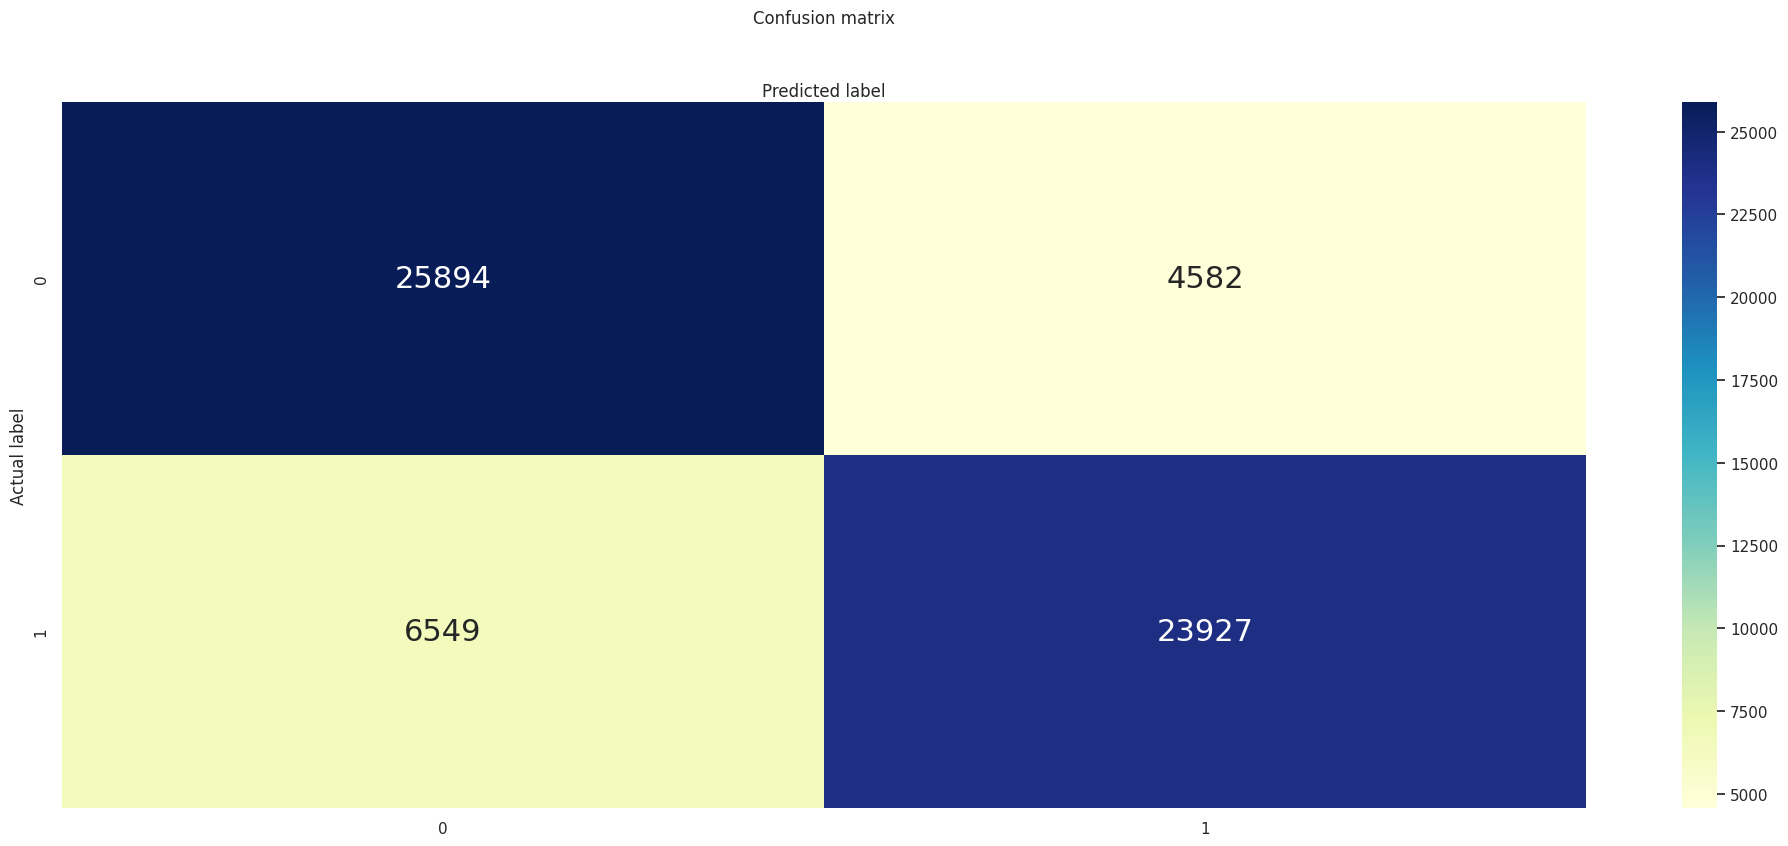

In [ ]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

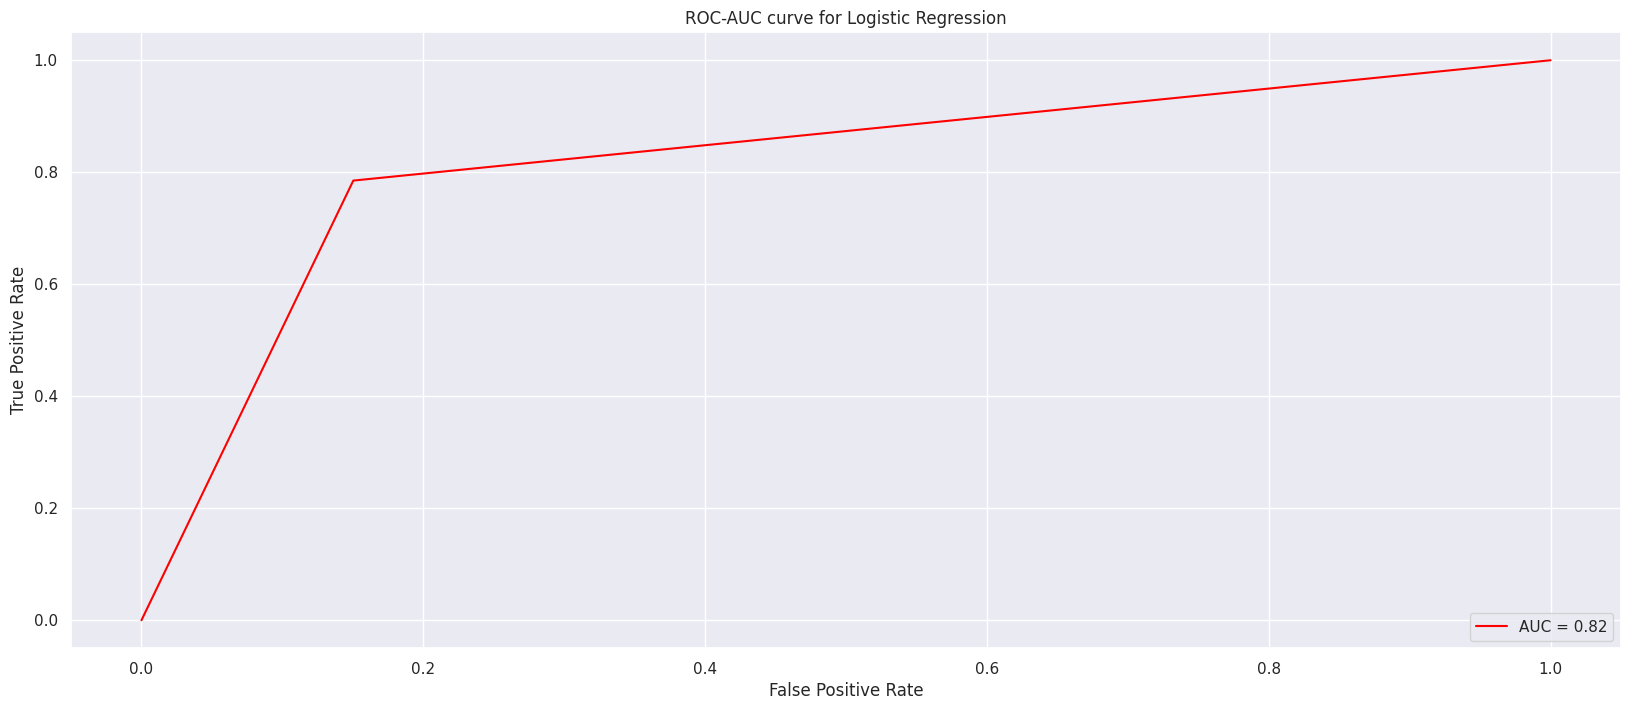

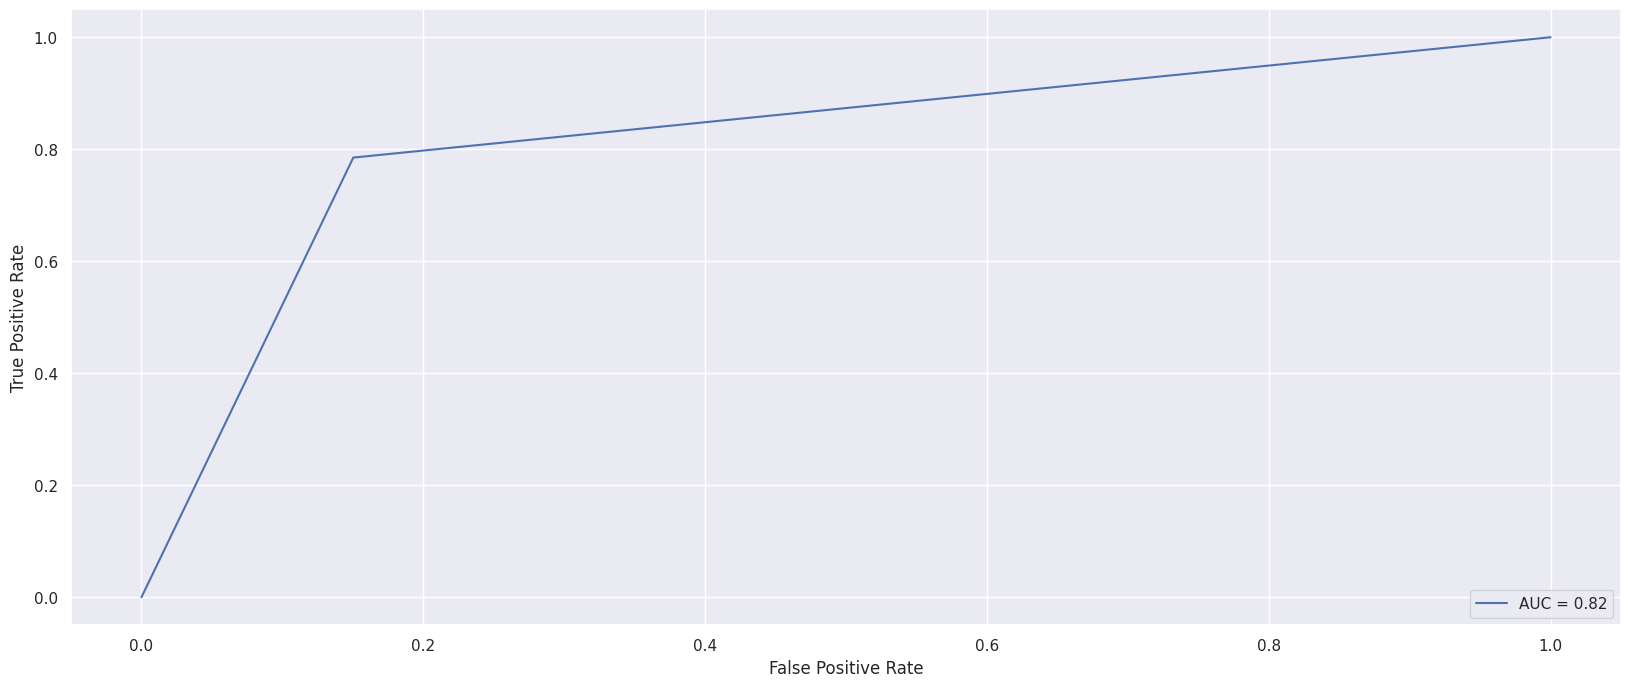

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_log)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot(color='red')  # Change 'red' to your desired color
plt.title("ROC-AUC curve for Logistic Regression")
display.plot()

## Evaluating the model

### Confusion matrix for K = 17

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[27424,  3052],
       [  847, 29629]])

### Confusion matrix evaluation metrics

In [ ]:
target_names = ['Not Heart Attack','Had Heart Attack']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

Not Heart Attack       0.97      0.90      0.93     30476
Had Heart Attack       0.91      0.97      0.94     30476

        accuracy                           0.94     60952
       macro avg       0.94      0.94      0.94     60952
    weighted avg       0.94      0.94      0.94     60952



### Visualizing confusion matrix

Text(0.5, 709.5555555555555, 'Predicted label')

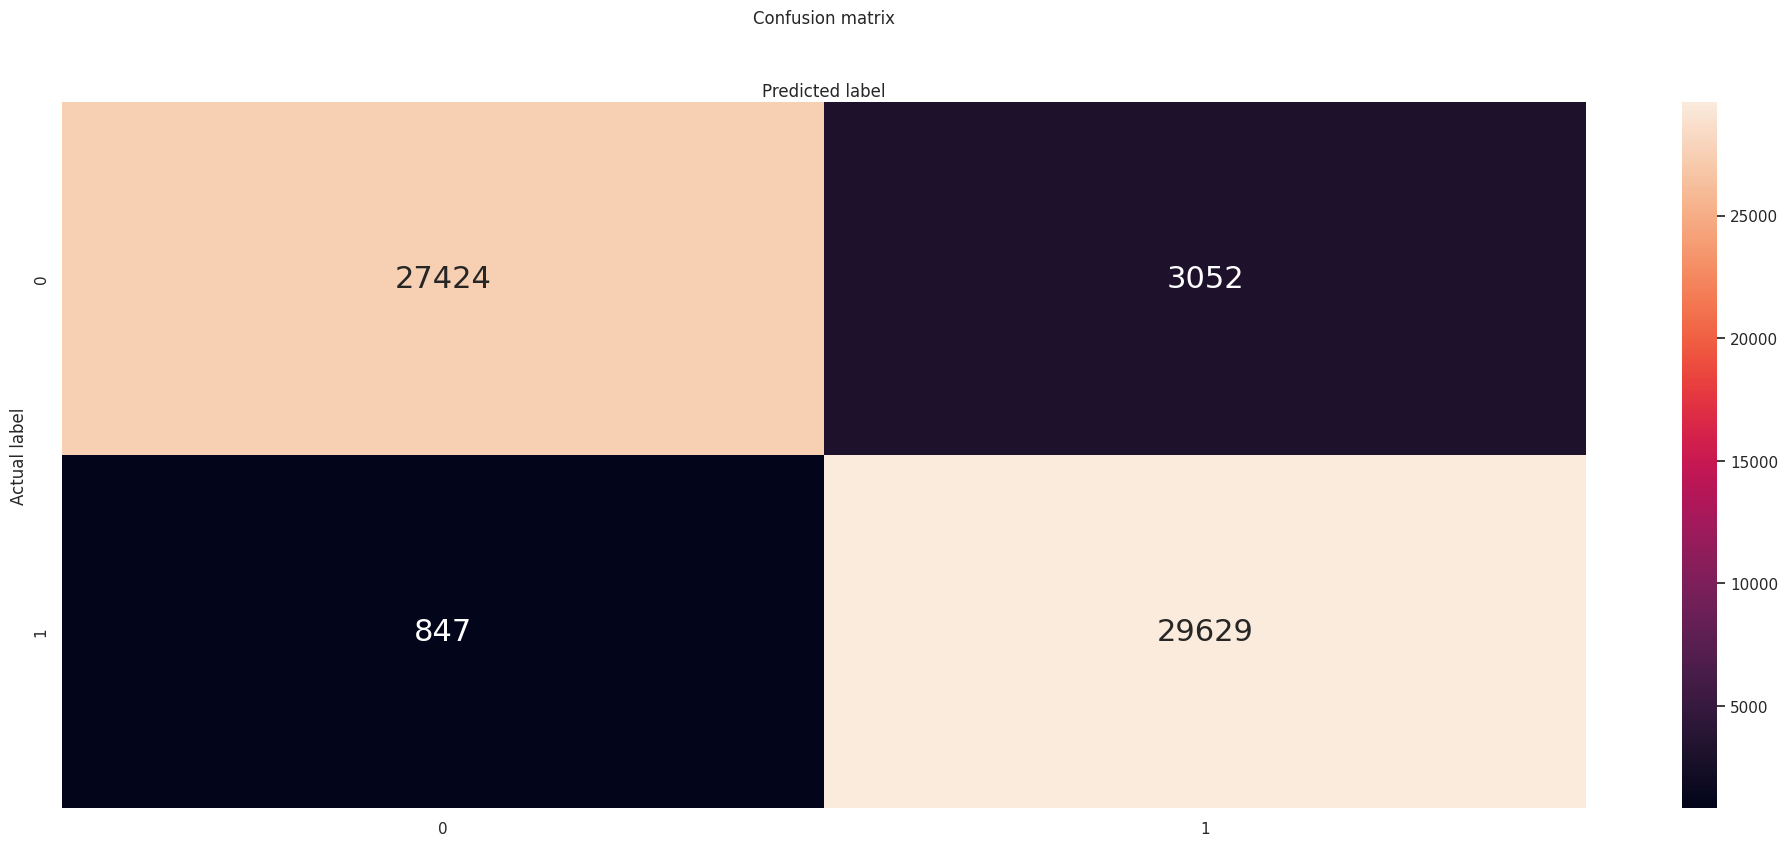

In [ ]:
class_names=[0,1]
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label',loc="center" )

## 2. Logistic Regression
###Reference:

In [ ]:
logreg = LogisticRegression(random_state = 16)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##Model evaluation using Confusion Matrix

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[4199,  823],
       [1009, 4013]])

##Confusion Matrix Evaluation Metrics

In [ ]:
target_names = ['Not Heart Attack','Had Heart Attack']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

Not Heart Attack       0.81      0.84      0.82      5022
Had Heart Attack       0.83      0.80      0.81      5022

        accuracy                           0.82     10044
       macro avg       0.82      0.82      0.82     10044
    weighted avg       0.82      0.82      0.82     10044



##Visualizing Confusion Matrix using Heatmap

Text(0.5, 709.5555555555555, 'Predicted label')

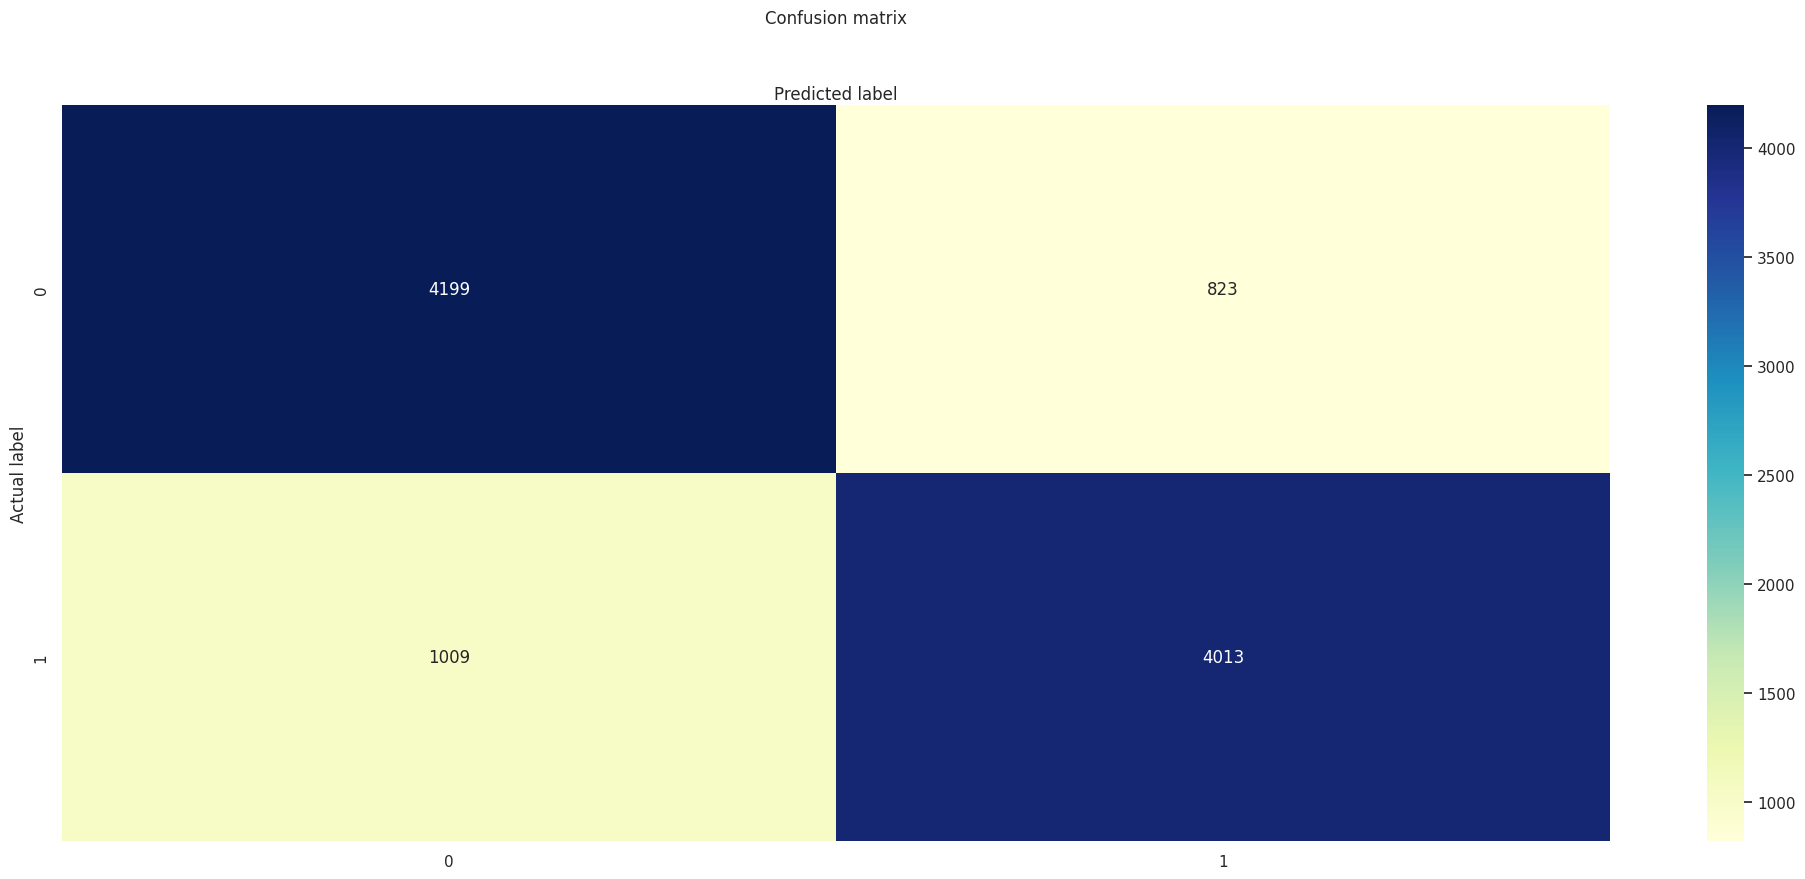

In [ ]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## 3. SVM

In [ ]:
#Build the model
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
# Trained the model
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.81      0.35      0.49      5022
         1.0       0.58      0.92      0.71      5022

    accuracy                           0.63     10044
   macro avg       0.70      0.63      0.60     10044
weighted avg       0.70      0.63      0.60     10044



In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time= 2.2min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time= 2.2min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.507 total time= 2.2min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time= 2.2min


KeyboardInterrupt: ignored